In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]:'구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
pop_Seoul = pd.read_excel('population_in_Seoul.xls', encoding = 'utf-8', header=2, parse_cols='B,D,G,J,N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [6]:
pop_Seoul.rename(columns={pop_Seoul.columns[0]:'구별',
                         pop_Seoul.columns[1]:'인구수',
                         pop_Seoul.columns[2]:'한국인',
                         pop_Seoul.columns[3]:'외국인',
                         pop_Seoul.columns[4]:'고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [7]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [8]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [9]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년']+CCTV_Seoul['2015년']+CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.sort_values(by='최근증가율',ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [10]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10158411.0,9891448.0,266963.0,1353486.0
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0


In [11]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164640.0,155109.0,9531.0,26034.0
2,중구,134174.0,125332.0,8842.0,21249.0
3,용산구,243922.0,228960.0,14962.0,36727.0
4,성동구,312933.0,304879.0,8054.0,40902.0
5,광진구,372414.0,357743.0,14671.0,43579.0


In [12]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164640.0,155109.0,9531.0,26034.0,5.788994,15.812682
2,중구,134174.0,125332.0,8842.0,21249.0,6.589950,15.836898
3,용산구,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862
4,성동구,312933.0,304879.0,8054.0,40902.0,2.573714,13.070529
5,광진구,372414.0,357743.0,14671.0,43579.0,3.939433,11.701762


In [13]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,강동구,1010,379,99,155,377,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
2,강북구,831,369,120,138,204,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
3,강서구,911,388,258,184,81,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
4,관악구,2109,846,260,390,613,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [14]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
1,강동구,1010,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
2,강북구,831,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
3,강서구,911,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
4,관악구,2109,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [15]:
data_result.set_index('구별', inplace=True)
data_result.to_csv('CCTV_result.csv', sep=',', encoding='utf-8')
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143
강동구,1010,166.490765,446760.0,442654.0,4106.0,55902.0,0.919062,12.512759
강북구,831,125.203252,329042.0,325552.0,3490.0,56078.0,1.060655,17.042809
강서구,911,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590
관악구,2109,149.290780,522849.0,505188.0,17661.0,69486.0,3.377839,13.289879


In [16]:
import platform

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:\Windows\Fonts\HANYGO230.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

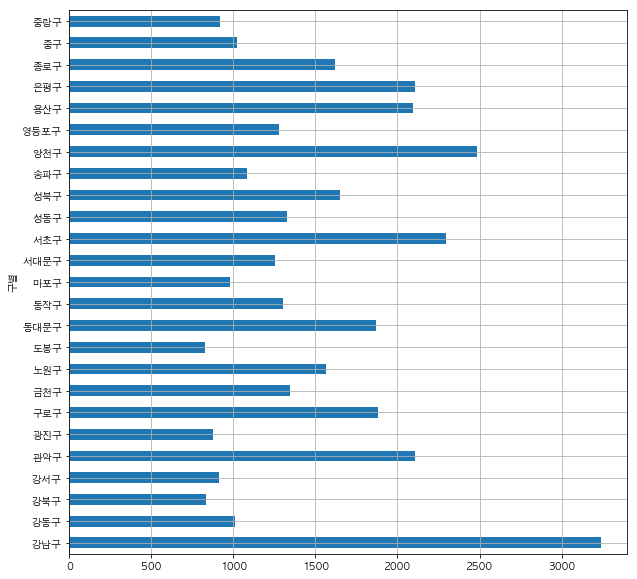

In [17]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

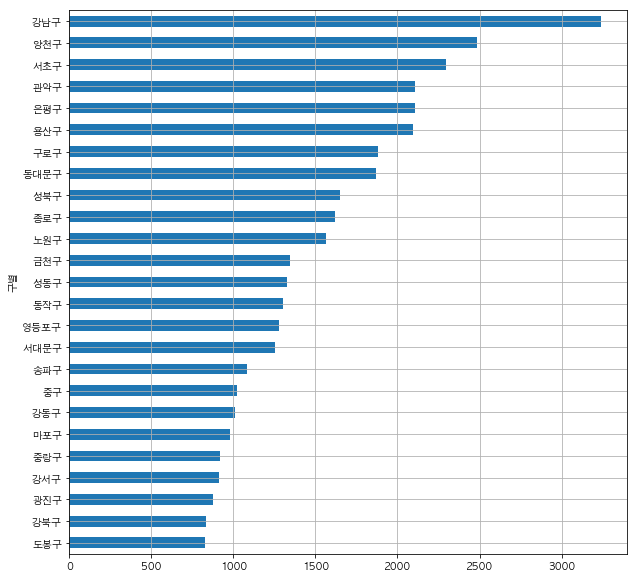

In [18]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

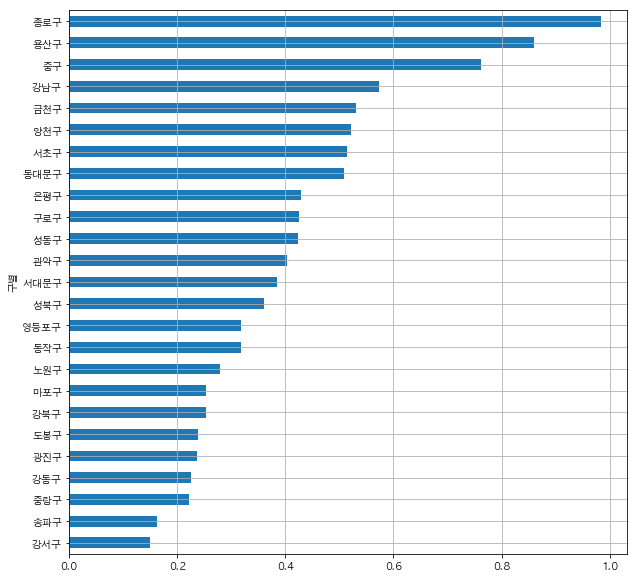

In [19]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

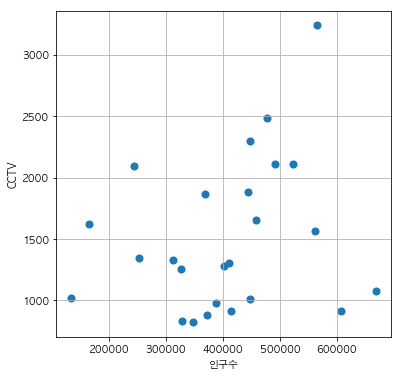

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()


In [21]:
import numpy as np
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.12481497e-03, 1.05826669e+03])

In [22]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

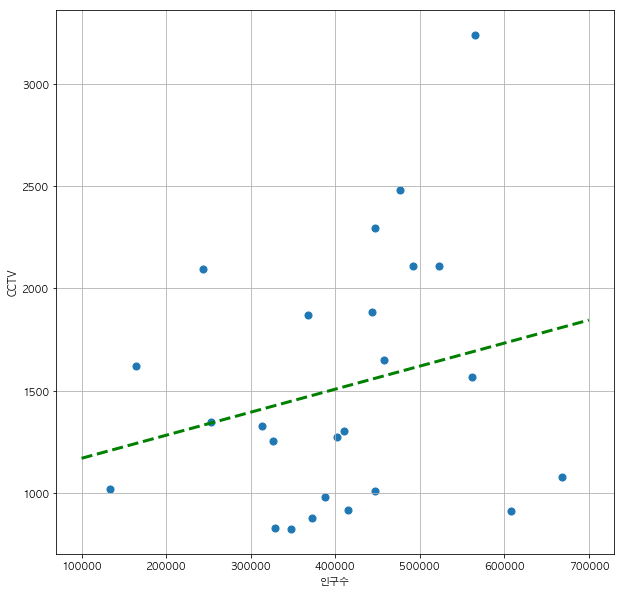

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [24]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,565731.0,560827.0,4904.0,64579.0,0.866843,11.415143,0.572357,1543.390613
양천구,2482,34.671731,476627.0,472730.0,3897.0,54598.0,0.817620,11.455079,0.520743,887.616126
강서구,911,134.793814,607877.0,601391.0,6486.0,75046.0,1.066992,12.345590,0.149866,831.015839
용산구,2096,53.216374,243922.0,228960.0,14962.0,36727.0,6.133928,15.056862,0.859291,763.366194
서초구,2297,63.371266,447177.0,442833.0,4344.0,52738.0,0.971427,11.793540,0.513667,735.741927


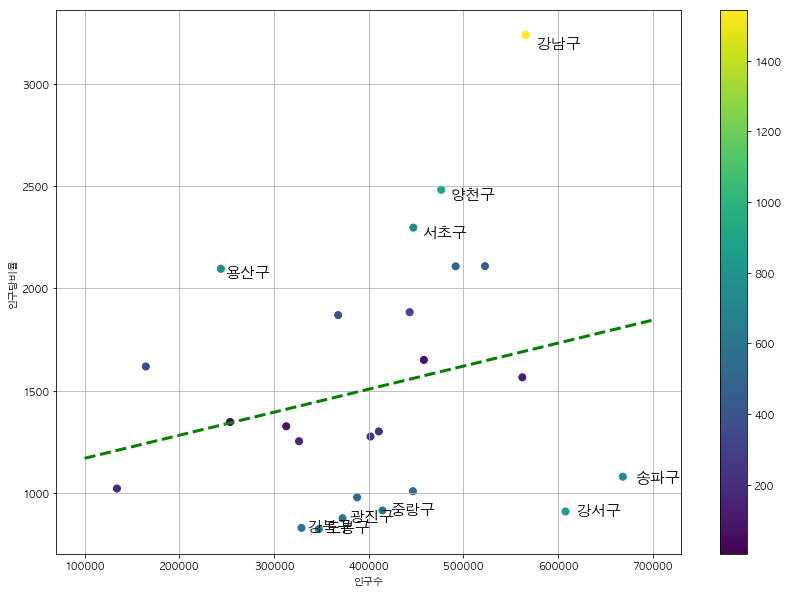

In [25]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()